# ibis 101

## ibis is a dataframe first library
> the portable Python dataframe library

In [1]:
import ibis

ibis.options.interactive = True  # this make it prints
# Connect to DuckDB
con = ibis.connect("duckdb://tpch.duckdb")

## basic ibis

In [2]:
part = con.table("part")
partsupp = con.table("partsupp")


In [3]:
ibis.options.interactive = True
part

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ p_partkey ┃ p_name                                   ┃ p_mfgr         ┃ p_brand  ┃ p_type                  ┃ p_size ┃ p_container ┃ p_retailprice   ┃ p_comment            ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ !int64    │ !string                                  │ !string        │ !string  │ !string                 │ !int32 │ !string     │ !decimal(15, 2) │ !string              │
├───────────┼──────────────────────────────────────────┼────────────────┼──────────┼─────────────────────────┼────────┼─────────────┼─────────────────┼──────────────────────┤
│         1 │ goldenrod lavender spring chocolate lace │ Manufacturer#1 │ Brand#13 │ PROMO BURNISHED COPPER  │      7 │ JUMBO PKG   │          901.00 │ ironic pinto be      │
│         2 │ blush thistle blue yellow saddle         │ Manufacturer#1 │ Brand#13 │ LARGE BRUSHED BRASS     │      1 │ LG CASE     │          902.00 │ nding, even pack     │
│         3 │ spring green yellow purple cornsilk      │ Manufacturer#4 │ Brand#42 │ STANDARD POLISHED BRASS │     21 │ WRAP CASE   │          903.00 │ ages. blithely fina  │
│         4 │ cornflower chocolate smoke green pink    │ Manufacturer#3 │ Brand#34 │ SMALL PLATED BRASS      │     14 │ MED DRUM    │          904.00 │ ckages. regul        │
│         5 │ forest brown coral puff cream            │ Manufacturer#3 │ Brand#32 │ STANDARD POLISHED TIN   │     15 │ SM PKG      │          905.00 │ pinto beans are      │
│         6 │ bisque cornflower lawn forest magenta    │ Manufacturer#2 │ Brand#24 │ PROMO PLATED STEEL      │      4 │ MED BAG     │          906.00 │ kages                │
│         7 │ moccasin green thistle khaki floral      │ Manufacturer#1 │ Brand#11 │ SMALL PLATED COPPER     │     45 │ SM BAG      │          907.00 │ gular pi             │
│         8 │ misty lace thistle snow royal            │ Manufacturer#4 │ Brand#44 │ PROMO BURNISHED TIN     │     41 │ LG DRUM     │          908.00 │ beans                │
│         9 │ thistle dim navajo dark gainsboro        │ Manufacturer#4 │ Brand#43 │ SMALL BURNISHED STEEL   │     12 │ WRAP CASE   │          909.00 │ ole furious          │
│        10 │ linen pink saddle puff powder            │ Manufacturer#5 │ Brand#54 │ LARGE BURNISHED STEEL   │     44 │ LG CAN      │          910.01 │ into beans about the │
│         … │ …                                        │ …              │ …        │ …                       │      … │ …           │               … │ …                    │
└───────────┴──────────────────────────────────────────┴────────────────┴──────────┴─────────────────────────┴────────┴─────────────┴─────────────────┴──────────────────────┘

### join

In [29]:
join = part.join(partsupp, part.p_partkey == partsupp.ps_partkey)
join

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ p_partkey ┃ p_name                                   ┃ p_mfgr         ┃ p_brand  ┃ p_type                  ┃ p_size ┃ p_container ┃ p_retailprice  ┃ p_comment           ┃ ps_partkey ┃ ps_suppkey ┃ ps_availqty ┃ ps_supplycost  ┃ ps_comment                                                                       ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64     │ string                                   │ string         │ string   │ string                  │ int32  │ string      │ decimal(15, 2) │ string              │ int64      │ int64      │ int64       │ decimal(15, 2) │ string                                                                           │
├───────────┼──────────────────────────────────────────┼────────────────┼──────────┼─────────────────────────┼────────┼─────────────┼────────────────┼─────────────────────┼────────────┼────────────┼─────────────┼────────────────┼──────────────────────────────────────────────────────────────────────────────────┤
│         1 │ goldenrod lavender spring chocolate lace │ Manufacturer#1 │ Brand#13 │ PROMO BURNISHED COPPER  │      7 │ JUMBO PKG   │         901.00 │ ironic pinto be     │          1 │          2 │        3325 │         771.64 │ blithely regular theodolites sleep slyly across the sometimes bold dependencies… │
│         1 │ goldenrod lavender spring chocolate lace │ Manufacturer#1 │ Brand#13 │ PROMO BURNISHED COPPER  │      7 │ JUMBO PKG   │         901.00 │ ironic pinto be     │          1 │       2502 │        8076 │         993.49 │ ts boost carefully ironic, regular accounts. final theodolites cajole slyly. fi… │
│         1 │ goldenrod lavender spring chocolate lace │ Manufacturer#1 │ Brand#13 │ PROMO BURNISHED COPPER  │      7 │ JUMBO PKG   │         901.00 │ ironic pinto be     │          1 │       5002 │        3956 │         337.09 │  fluffily regular multipliers? sheaves integrate slyly ideas. furiously special… │
│         1 │ goldenrod lavender spring chocolate lace │ Manufacturer#1 │ Brand#13 │ PROMO BURNISHED COPPER  │      7 │ JUMBO PKG   │         901.00 │ ironic pinto be     │          1 │       7502 │        4069 │         357.84 │ press deposits. special courts about the slyly final accounts haggle blithely f… │
│         2 │ blush thistle blue yellow saddle         │ Manufacturer#1 │ Brand#13 │ LARGE BRUSHED BRASS     │      1 │ LG CASE     │         902.00 │ nding, even pack    │          2 │          3 │        8895 │         378.49 │ sits. furiously regular packages boost blithely? requests affix slyly even pack… │
│         2 │ blush thistle blue yellow saddle         │ Manufacturer#1 │ Brand#13 │ LARGE BRUSHED BRASS     │      1 │ LG CASE     │         902.00 │ nding, even pack    │          2 │       2503 │        4969 │         915.27 │ deposits doze. slyly express pinto beans haggle blithely against the furiously … │
│         2 │ blush thistle blue yellow saddle         │ Manufacturer#1 │ Brand#13 │ LARGE BRUSHED BRASS     │      1 │ LG CASE     │         902.00 │ nding, even pack    │          2 │       5003 │        8539 │         438.37 │ s. furiously final dependencies boost slyly slyly regular accounts. final depos… │
│         2 │ blush thistle blue yellow saddle         │ Manufacturer#1 │ Brand#13 │ LARGE BRUSHED BRASS     │      1 │ LG CASE     │         902.00 │ nding, even pack    │          2 │       7503 │        3025 │         306.39 │ ecial accounts

### Buildin an internal execution graph

In [5]:
from ibis import _
from ibis.expr.visualize import to_graph


In [6]:
part

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ p_partkey ┃ p_name                                   ┃ p_mfgr         ┃ p_brand  ┃ p_type                  ┃ p_size ┃ p_container ┃ p_retailprice   ┃ p_comment            ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ !int64    │ !string                                  │ !string        │ !string  │ !string                 │ !int32 │ !string     │ !decimal(15, 2) │ !string              │
├───────────┼──────────────────────────────────────────┼────────────────┼──────────┼─────────────────────────┼────────┼─────────────┼─────────────────┼──────────────────────┤
│         1 │ goldenrod lavender spring chocolate lace │ Manufacturer#1 │ Brand#13 │ PROMO BURNISHED COPPER  │      7 │ JUMBO PKG   │          901.00 │ ironic pinto be      │
│         2 │ blush thistle blue yellow saddle         │ Manufacturer#1 │ Brand#13 │ LARGE BRUSHED BRASS     │      1 │ LG CASE     │          902.00 │ nding, even pack     │
│         3 │ spring green yellow purple cornsilk      │ Manufacturer#4 │ Brand#42 │ STANDARD POLISHED BRASS │     21 │ WRAP CASE   │          903.00 │ ages. blithely fina  │
│         4 │ cornflower chocolate smoke green pink    │ Manufacturer#3 │ Brand#34 │ SMALL PLATED BRASS      │     14 │ MED DRUM    │          904.00 │ ckages. regul        │
│         5 │ forest brown coral puff cream            │ Manufacturer#3 │ Brand#32 │ STANDARD POLISHED TIN   │     15 │ SM PKG      │          905.00 │ pinto beans are      │
│         6 │ bisque cornflower lawn forest magenta    │ Manufacturer#2 │ Brand#24 │ PROMO PLATED STEEL      │      4 │ MED BAG     │          906.00 │ kages                │
│         7 │ moccasin green thistle khaki floral      │ Manufacturer#1 │ Brand#11 │ SMALL PLATED COPPER     │     45 │ SM BAG      │          907.00 │ gular pi             │
│         8 │ misty lace thistle snow royal            │ Manufacturer#4 │ Brand#44 │ PROMO BURNISHED TIN     │     41 │ LG DRUM     │          908.00 │ beans                │
│         9 │ thistle dim navajo dark gainsboro        │ Manufacturer#4 │ Brand#43 │ SMALL BURNISHED STEEL   │     12 │ WRAP CASE   │          909.00 │ ole furious          │
│        10 │ linen pink saddle puff powder            │ Manufacturer#5 │ Brand#54 │ LARGE BURNISHED STEEL   │     44 │ LG CAN      │          910.01 │ into beans about the │
│         … │ …                                        │ …              │ …        │ …                       │      … │ …           │               … │ …                    │
└───────────┴──────────────────────────────────────────┴────────────────┴──────────┴─────────────────────────┴────────┴─────────────┴─────────────────┴──────────────────────┘

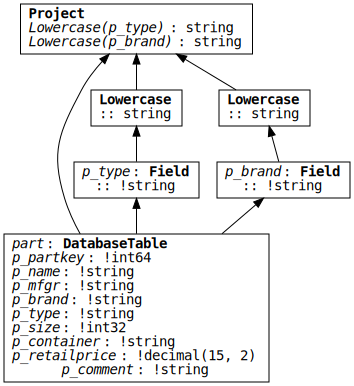

In [9]:
expr = part.select(_.p_type.lower(), _.p_brand.lower())
to_graph(expr)


In [10]:
ibis.to_sql(expr)


```sql
SELECT
  LOWER("t0"."p_type") AS "Lowercase(p_type)",
  LOWER("t0"."p_brand") AS "Lowercase(p_brand)"
FROM "part" AS "t0"
```

# Construct queries incrementally - TPHC Q1 Pricing summary

In [11]:
from __future__ import annotations
import ibis
import datetime
from ibis.expr.types import DateScalar
from dateutil.relativedelta import relativedelta


def add_date(datestr: str, dy: int = 0, dm: int = 0, dd: int = 0) -> DateScalar:
    dt = datetime.date.fromisoformat(datestr)
    dt += relativedelta(years=dy, months=dm, days=dd)
    return ibis.date(dt.isoformat())


lineitem = con.table("lineitem", database=f"tpch")
lineitem


┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ l_orderkey ┃ l_partkey ┃ l_suppkey ┃ l_linenumber ┃ l_quantity      ┃ l_extendedprice ┃ l_discount      ┃ l_tax           ┃ l_returnflag ┃ l_linestatus ┃ l_shipdate ┃ l_commitdate ┃ l_receiptdate ┃ l_shipinstruct    ┃ l_shipmode ┃ l_comment                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ !int64     │ !int64    │ !int64    │ !int64       │ !decimal(15, 2) │ !decimal(15, 2) │ !decimal(15, 2) │ !decimal(15, 2) │ !string      │ !string      │ !date      │ !date        │ !date         │ !string           │ !string    │ !string                             │
├────────────┼───────────┼───────────┼──────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼──────────────┼──────────────┼────────────┼──────────────┼───────────────┼───────────────────┼────────────┼─────────────────────────────────────┤
│          1 │    155190 │      7706 │            1 │           17.00 │        21168.23 │            0.04 │            0.02 │ N            │ O            │ 1996-03-13 │ 1996-02-12   │ 1996-03-22    │ DELIVER IN PERSON │ TRUCK      │ to beans x-ray carefull             │
│          1 │     67310 │      7311 │            2 │           36.00 │        45983.16 │            0.09 │            0.06 │ N            │ O            │ 1996-04-12 │ 1996-02-28   │ 1996-04-20    │ TAKE BACK RETURN  │ MAIL       │  according to the final foxes. qui  │
│          1 │     63700 │      3701 │            3 │            8.00 │        13309.60 │            0.10 │            0.02 │ N            │ O            │ 1996-01-29 │ 1996-03-05   │ 1996-01-31    │ TAKE BACK RETURN  │ REG AIR    │ ourts cajole above the furiou       │
│          1 │      2132 │      4633 │            4 │           28.00 │        28955.64 │            0.09 │            0.06 │ N            │ O            │ 1996-04-21 │ 1996-03-30   │ 1996-05-16    │ NONE              │ AIR        │ s cajole busily above t             │
│          1 │     24027 │      1534 │            5 │           24.00 │        22824.48 │            0.10 │            0.04 │ N            │ O            │ 1996-03-30 │ 1996-03-14   │ 1996-04-01    │ NONE              │ FOB        │  the regular, regular pa            │
│          1 │     15635 │       638 │            6 │           32.00 │        49620.16 │            0.07 │            0.02 │ N            │ O            │ 1996-01-30 │ 1996-02-07   │ 1996-02-03    │ DELIVER IN PERSON │ MAIL       │ rouches. special                    │
│          2 │    106170 │      1191 │            1 │           38.00 │        44694.46 │            0.00 │            0.05 │ N            │ O            │ 1997-01-28 │ 1997-01-14   │ 1997-02-02    │ TAKE BACK RETURN  │ RAIL       │ re. enticingly regular instruct     │
│          3 │      4297 │      1798 │            1 │           45.00 │        54058.05 │            0.06 │            0.00 │ R            │ F            │ 1994-02-02 │ 1994-01-04   │ 1994-02-23    │ NONE              │ AIR        │ s cajole above the pinto beans. iro │
│          3 │     19036 │      6540 │            2 │           49.00 │        46796.47 │            0.10 │            0.00 │ R            │ F            │ 1993-11-09 │ 1993-12-20   │ 1993-11-24    │ TAKE BACK RETURN  │ RAIL       │ ecial pinto beans. sly              │
│          3 │    128449 │      3474 │            3 │           27.00 │        39890.88 │            0.06 │            0.07 │ A            │ F            │ 1994-01-16 │ 1993-11-22   │ 1994-01-23    │ DELIVE

In [12]:
t = lineitem
where = lineitem.filter(t.l_shipdate <= add_date("1998-12-01", dd=-90))

In [13]:
where

┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ l_orderkey ┃ l_partkey ┃ l_suppkey ┃ l_linenumber ┃ l_quantity      ┃ l_extendedprice ┃ l_discount      ┃ l_tax           ┃ l_returnflag ┃ l_linestatus ┃ l_shipdate ┃ l_commitdate ┃ l_receiptdate ┃ l_shipinstruct    ┃ l_shipmode ┃ l_comment                           ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ !int64     │ !int64    │ !int64    │ !int64       │ !decimal(15, 2) │ !decimal(15, 2) │ !decimal(15, 2) │ !decimal(15, 2) │ !string      │ !string      │ !date      │ !date        │ !date         │ !string           │ !string    │ !string                             │
├────────────┼───────────┼───────────┼──────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼──────────────┼──────────────┼────────────┼──────────────┼───────────────┼───────────────────┼────────────┼─────────────────────────────────────┤
│          1 │    155190 │      7706 │            1 │           17.00 │        21168.23 │            0.04 │            0.02 │ N            │ O            │ 1996-03-13 │ 1996-02-12   │ 1996-03-22    │ DELIVER IN PERSON │ TRUCK      │ to beans x-ray carefull             │
│          1 │     67310 │      7311 │            2 │           36.00 │        45983.16 │            0.09 │            0.06 │ N            │ O            │ 1996-04-12 │ 1996-02-28   │ 1996-04-20    │ TAKE BACK RETURN  │ MAIL       │  according to the final foxes. qui  │
│          1 │     63700 │      3701 │            3 │            8.00 │        13309.60 │            0.10 │            0.02 │ N            │ O            │ 1996-01-29 │ 1996-03-05   │ 1996-01-31    │ TAKE BACK RETURN  │ REG AIR    │ ourts cajole above the furiou       │
│          1 │      2132 │      4633 │            4 │           28.00 │        28955.64 │            0.09 │            0.06 │ N            │ O            │ 1996-04-21 │ 1996-03-30   │ 1996-05-16    │ NONE              │ AIR        │ s cajole busily above t             │
│          1 │     24027 │      1534 │            5 │           24.00 │        22824.48 │            0.10 │            0.04 │ N            │ O            │ 1996-03-30 │ 1996-03-14   │ 1996-04-01    │ NONE              │ FOB        │  the regular, regular pa            │
│          1 │     15635 │       638 │            6 │           32.00 │        49620.16 │            0.07 │            0.02 │ N            │ O            │ 1996-01-30 │ 1996-02-07   │ 1996-02-03    │ DELIVER IN PERSON │ MAIL       │ rouches. special                    │
│          2 │    106170 │      1191 │            1 │           38.00 │        44694.46 │            0.00 │            0.05 │ N            │ O            │ 1997-01-28 │ 1997-01-14   │ 1997-02-02    │ TAKE BACK RETURN  │ RAIL       │ re. enticingly regular instruct     │
│          3 │      4297 │      1798 │            1 │           45.00 │        54058.05 │            0.06 │            0.00 │ R            │ F            │ 1994-02-02 │ 1994-01-04   │ 1994-02-23    │ NONE              │ AIR        │ s cajole above the pinto beans. iro │
│          3 │     19036 │      6540 │            2 │           49.00 │        46796.47 │            0.10 │            0.00 │ R            │ F            │ 1993-11-09 │ 1993-12-20   │ 1993-11-24    │ TAKE BACK RETURN  │ RAIL       │ ecial pinto beans. sly              │
│          3 │    128449 │      3474 │            3 │           27.00 │        39890.88 │            0.06 │            0.07 │ A            │ F            │ 1994-01-16 │ 1993-11-22   │ 1994-01-23    │ DELIVE

In [14]:
discount_price = t.l_extendedprice * (1 - t.l_discount)
charge = discount_price * (1 + t.l_tax)

In [15]:
query = where.group_by(["l_returnflag", "l_linestatus"])
query = query.aggregate(
    sum_qty=t.l_quantity.sum(),
    sum_base_price=t.l_extendedprice.sum(),
    sum_disc_price=discount_price.sum(),
    sum_charge=charge.sum(),
    avg_qty=t.l_quantity.mean(),
    avg_price=t.l_extendedprice.mean(),
    avg_disc=t.l_discount.mean(),
    count_order=lambda t: t.count(),
)
query = query.order_by(["l_returnflag", "l_linestatus"])

In [16]:
query

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ l_returnflag ┃ l_linestatus ┃ sum_qty        ┃ sum_base_price  ┃ sum_disc_price  ┃ sum_charge      ┃ avg_qty        ┃ avg_price      ┃ avg_disc       ┃ count_order ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ !string      │ !string      │ decimal(38, 2) │ decimal(38, 2)  │ decimal(38, 2)  │ decimal(38, 2)  │ decimal(15, 2) │ decimal(15, 2) │ decimal(15, 2) │ int64       │
├──────────────┼──────────────┼────────────────┼─────────────────┼─────────────────┼─────────────────┼────────────────┼────────────────┼────────────────┼─────────────┤
│ A            │ F            │    75468214.00 │ 113173108801.46 │ 107516514269.74 │ 111818130445.65 │          25.52 │       38273.13 │           0.05 │     2956986 │
│ N            │ F            │     1982834.00 │   2975009420.76 │   2826164336.10 │   2939298446.38 │          25.52 │       38284.47 │           0.05 │       77708 │
│ N            │ O            │   148952080.00 │ 223403459395.48 │ 212236460615.21 │ 220734087744.99 │          25.50 │       38249.12 │           0.05 │     5840748 │
│ R            │ F            │    75439506.00 │ 113136082761.80 │ 107482585369.20 │ 111779238239.66 │          25.51 │       38250.85 │           0.05 │     2957740 │
└──────────────┴──────────────┴────────────────┴─────────────────┴─────────────────┴─────────────────┴────────────────┴────────────────┴────────────────┴─────────────┘

## Using the `Table.sql` method

In [17]:
sql = """
SELECT
    l_returnflag,
    l_linestatus,
    SUM(l_quantity) AS sum_qty,
    SUM(l_extendedprice) AS sum_base_price,
    SUM(l_extendedprice * (1 - l_discount)) AS sum_disc_price,
    SUM(l_extendedprice * (1 - l_discount) * (1 + l_tax)) AS sum_charge,
    AVG(l_quantity) AS avg_qty,
    AVG(l_extendedprice) AS avg_price,
    AVG(l_discount) AS avg_disc,
    COUNT(*) AS count_order
FROM
    lineitem
WHERE
    l_shipdate <= DATE '1998-12-01' - INTERVAL '90' DAY
GROUP BY
    l_returnflag,
    l_linestatus
ORDER BY
    l_returnflag,
    l_linestatus;
"""

In [18]:
con.sql(sql)

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ l_returnflag ┃ l_linestatus ┃ sum_qty        ┃ sum_base_price  ┃ sum_disc_price    ┃ sum_charge          ┃ avg_qty   ┃ avg_price    ┃ avg_disc ┃ count_order ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ string       │ string       │ decimal(38, 2) │ decimal(38, 2)  │ decimal(38, 4)    │ decimal(38, 6)      │ float64   │ float64      │ float64  │ int64       │
├──────────────┼──────────────┼────────────────┼─────────────────┼───────────────────┼─────────────────────┼───────────┼──────────────┼──────────┼─────────────┤
│ A            │ F            │    75468214.00 │ 113173108801.46 │ 107516514269.7400 │ 111818130445.655384 │ 25.522006 │ 38273.129735 │ 0.049985 │     2956986 │
│ N            │ F            │     1982834.00 │   2975009420.76 │   2826164336.1082 │   2939298446.388750 │ 25.516472 │ 38284.467761 │ 0.050093 │       77708 │
│ N            │ O            │   148952080.00 │ 223403459395.48 │ 212236460615.2112 │ 220734087744.994020 │ 25.502227 │ 38249.117989 │ 0.049997 │     5840748 │
│ R            │ F            │    75439506.00 │ 113136082761.80 │ 107482585369.2080 │ 111779238239.663864 │ 25.505794 │ 38250.854626 │ 0.050009 │     2957740 │
└──────────────┴──────────────┴────────────────┴─────────────────┴───────────────────┴─────────────────────┴───────────┴──────────────┴──────────┴─────────────┘

# Q15 CTE example - Top Supplier Query

In [19]:
sql_q15 = """
with revenue0 as (
    select
        l_suppkey as supplier_no,
        sum(l_extendedprice * (1 - l_discount)) as total_revenue
    from
        lineitem
    where
        l_shipdate >= date '1996-01-01'
        and l_shipdate < date '1996-01-01' + interval '3' month
    group by
        l_suppkey
)
select
    s_suppkey,
    s_name,
    s_address,
    s_phone,
    total_revenue
from
    supplier,
    revenue0
where
    s_suppkey = supplier_no
    and total_revenue = (
        select
            max(total_revenue)
        from
            revenue0
    )
order by
    s_suppkey
"""

## Break it down into multiple table

In [20]:
revenue = con.sql("""
    select
        l_suppkey as supplier_no,
        sum(l_extendedprice * (1 - l_discount)) as total_revenue
    from
        lineitem
    where
        l_shipdate >= date '1996-01-01'
        and l_shipdate < date '1996-01-01' + interval '3' month
    group by
        l_suppkey
        """).alias("revenue")

In [22]:
query = revenue.sql("""select
    s_suppkey,
    s_name,
    s_address,
    s_phone,
    total_revenue
from
    supplier,
    revenue
where
    s_suppkey = supplier_no
    and total_revenue = (
        select
            max(total_revenue)
        from
            revenue
    )
order by
    s_suppkey""")

In [23]:
ibis.to_sql(revenue)

```sql
WITH "revenue" AS (
  SELECT
    l_suppkey AS supplier_no,
    SUM(l_extendedprice * (
      1 - l_discount
    )) AS total_revenue
  FROM lineitem
  WHERE
    l_shipdate >= CAST('1996-01-01' AS DATE)
    AND l_shipdate < CAST('1996-01-01' AS DATE) + INTERVAL '3' MONTH
  GROUP BY
    l_suppkey
)
SELECT
  *
FROM "revenue"
```

## Build the CTE first

In [24]:
revenue = con.sql("""    select
        l_suppkey as supplier_no,
        sum(l_extendedprice * (1 - l_discount)) as total_revenue
    from
        lineitem
    where
        l_shipdate >= date '1996-01-01'
        and l_shipdate < date '1996-01-01' + interval '3' month
    group by
        l_suppkey""").alias("revenue")
supplier = revenue.sql("select * from supplier")


## Build the query

In [25]:
final = supplier.sql("""select
    s_suppkey,
    s_name,
    s_address,
    s_phone,
    total_revenue
from
    supplier,
    revenue
where
    s_suppkey = supplier_no
    and total_revenue = (
        select
            max(total_revenue)
        from
            revenue
    )
order by
    s_suppkey""")

In [26]:
final

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ s_suppkey ┃ s_name             ┃ s_address         ┃ s_phone         ┃ total_revenue  ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ int64     │ string             │ string            │ string          │ decimal(38, 4) │
├───────────┼────────────────────┼───────────────────┼─────────────────┼────────────────┤
│      8449 │ Supplier#000008449 │ 5BXWsJERA2mP5OyO4 │ 20-469-856-8873 │   3545254.4174 │
│      8449 │ Supplier#000008449 │ 5BXWsJERA2mP5OyO4 │ 20-469-856-8873 │   3545254.4174 │
└───────────┴────────────────────┴───────────────────┴─────────────────┴────────────────┘

# Bonus: Ibis expression + sql

In [ ]:
revenue.filter(revenue.total_revenue < 1000000)


┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ supplier_no ┃ total_revenue  ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ int64       │ decimal(38, 4) │
├─────────────┼────────────────┤
│        3701 │    999540.0360 │
│        6836 │    945408.3378 │
│         588 │    984253.3666 │
│        7300 │    736906.9482 │
│        5091 │    908724.7276 │
│        3636 │    869185.6532 │
│        4646 │    905186.8186 │
│        7820 │    838587.9808 │
│        5007 │    873000.0130 │
│         959 │    849076.6788 │
│           … │              … │
└─────────────┴────────────────┘

In [28]:
ibis.to_sql(expr)

```sql
WITH "revenue" AS (
  SELECT
    l_suppkey AS supplier_no,
    SUM(l_extendedprice * (
      1 - l_discount
    )) AS total_revenue
  FROM lineitem
  WHERE
    l_shipdate >= CAST('1996-01-01' AS DATE)
    AND l_shipdate < CAST('1996-01-01' AS DATE) + INTERVAL '3' MONTH
  GROUP BY
    l_suppkey
)
SELECT
  *
FROM "revenue" AS "t1"
WHERE
  "t1"."total_revenue" < 1000000
```